In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings 
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
warnings.filterwarnings('ignore')
os.listdir('../input/testtraindata/')

['Train_Set', 'Test_Set']

**Import the data to a python readable format**

In [2]:
base_train_dir = '../input/testtraindata/Train_Set/'
base_test_dir = '../input/testtraindata/Test_Set/'

*Add data from different files to one*

In [50]:
test_data = pd.DataFrame(columns = ['activity','ax','ay','az','gx','gy','gz'])
files = os.listdir(base_test_dir)
for f in files:
    df = pd.read_csv(base_test_dir+f)
    df['activity'] = (f.split('.')[0].split('_')[-1])+' '
    test_data = pd.concat([test_data,df],axis = 0)
test_data.activity.unique()

array(['lying ', 'standing ', 'sitting ', 'walking '], dtype=object)

*Check for missing values*

In [51]:
print(test_data.info())
print('Shape: ',test_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1004 entries, 0 to 250
Data columns (total 7 columns):
activity    1004 non-null object
ax          1004 non-null float64
ay          1004 non-null float64
az          1004 non-null float64
gx          1004 non-null float64
gy          1004 non-null float64
gz          1004 non-null float64
dtypes: float64(6), object(1)
memory usage: 62.8+ KB
None
Shape:  (1004, 7)


*Follow same steps as above*

In [52]:
train_data = pd.DataFrame(columns = ['activity','ax','ay','az','gx','gy','gz'])
train_folders = os.listdir(base_train_dir)

for tf in train_folders:
    files = os.listdir(base_train_dir+tf)
    for f in files:
        df = pd.read_csv(base_train_dir+tf+'/'+f)
        train_data = pd.concat([train_data,df],axis = 0)
train_data.activity.unique()

array(['sitting ', 'standing ', 'lying ', 'walking '], dtype=object)

In [53]:
print(train_data.info())
print('Shape: ',train_data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3012 entries, 0 to 250
Data columns (total 7 columns):
activity    3012 non-null object
ax          3012 non-null float64
ay          3012 non-null float64
az          3012 non-null float64
gx          3012 non-null float64
gy          3012 non-null float64
gz          3012 non-null float64
dtypes: float64(6), object(1)
memory usage: 188.2+ KB
None
Shape:  (3012, 7)


**Since we will use Cross Validation technique, let us combine the test and training set**

In [54]:
dataset = pd.concat([train_data, test_data], axis = 0, ignore_index=True)
print(dataset.activity.unique())

['sitting ' 'standing ' 'lying ' 'walking ']


*Shuffle the data randomly*

In [55]:
dataset = shuffle(dataset)
dataset.reset_index(drop = True,inplace = True)
dataset.head()

,activity,ax,ay,az,gx,gy,gz
0,walking,0.4224,-8.6035,5.0626,-0.3992,0.1313,0.7200
1,sitting,-9.7751,1.0048,1.4167,0.0040,0.0091,0.0012
2,standing,2.2526,-9.5665,-0.8877,-0.0034,0.0118,0.0039
3,sitting,9.6929,-1.3763,0.3412,-0.0130,0.0486,0.0406
4,standing,-1.3143,-9.7629,-1.0338,0.0085,0.0236,0.0106


*Convert categorical variable to integer format*

*We can use Label Encoder and One Hot Encoder also, for simplicity here I am using get_dummies method*

In [56]:
df_dummies = pd.get_dummies(dataset['activity'])
df_dummies.head()

,lying,sitting,standing,walking
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


*Combine everything together and we can here remove one dependent variable since its value can be determined by other 3 variables*

In [80]:
final_dataset = pd.concat([df_dummies, dataset], axis = 1)
final_dataset.drop(['activity','walking '],axis = 1,  inplace = True)
final_dataset.head()

,lying,sitting,standing,ax,ay,az,gx,gy,gz
0,0,0,0,0.4224,-8.6035,5.0626,-0.3992,0.1313,0.7200
1,0,1,0,-9.7751,1.0048,1.4167,0.0040,0.0091,0.0012
2,0,0,1,2.2526,-9.5665,-0.8877,-0.0034,0.0118,0.0039
3,0,1,0,9.6929,-1.3763,0.3412,-0.0130,0.0486,0.0406
4,0,0,1,-1.3143,-9.7629,-1.0338,0.0085,0.0236,0.0106


**Our dataset is ready and we can now use it however we want**

*Lets see how values differ as we do an activity*

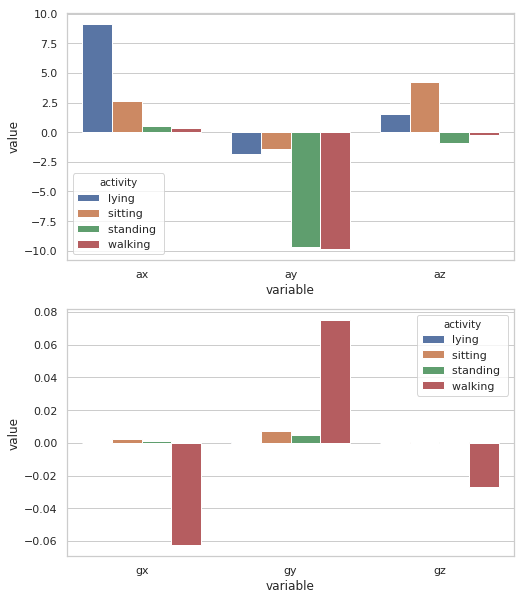

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
f,ax = plt.subplots(figsize = (8,10))
sns.set(style= 'whitegrid')
plt.subplot(2,1,1)
dfa = dataset.groupby('activity', as_index=False)['ax','ay','az'].mean()
dfa = dfa.melt('activity')
sns.barplot(dfa.variable,dfa.value, hue = dfa.activity)
plt.subplot(2,1,2)
dfg = dataset.groupby('activity', as_index=False)['gx','gy','gz'].mean()
dfg = dfg.melt('activity')
sns.barplot(dfg.variable,dfg.value, hue = dfg.activity)

*The above graph roughly tells that different axis of accelerometer and gyroscope produce different values as we do an activity. For eg. while walking all the axis of gyroscope give higher readings than the rest*

*We can from here use Linear models like Logistic Regression, Decision Tress, etc. or we can also make a ANN to solve the problem*

In [82]:
X = np.array(final_dataset.iloc[:,3:])
y = np.array(final_dataset.iloc[:,:3])

print('X: ',X.shape)
print('y: ', y.shape)

X:  (4016, 6)
y:  (4016, 3)


*Let us use Random Forest algorithm and check the accuracy*

In [83]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
#from sklearn.model_selection import train_test_split
#X_train, X_val, y_train, y_val  = train_test_split(X,y, test_size = 0.2)
#model.fit(X_train,y_train)
#model.score(X_test,y_test)
from sklearn.model_selection import cross_val_score
print('Cross Val Accuracy: {:0.2f}'.format(cross_val_score(model,X,y, cv = 5).mean()*100) + '%')

Cross Val Accuracy: 99.83%


**Random Forest gives us a great accuracy of nearly 100%**

*Therefore, the dataset is quite simplified and we don't need to use Neural Networks for it*

**Let us check with some other models too**

In [84]:
final_dataset = pd.concat([df_dummies, dataset], axis = 1)
final_dataset.drop(['activity'],axis = 1,  inplace = True)
X = np.array(final_dataset.iloc[:,4:])
y = np.array(final_dataset.iloc[:,:4])

print('X: ',X.shape)
print('y: ', y.shape)

X:  (4016, 6)
y:  (4016, 4)


In [85]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#model_lr = LogisticRegression()
model_nb = GaussianNB()
model_dt = DecisionTreeClassifier()

#print('Cross Val Accuracy (LR): {:0.2f}'.format(cross_val_score(model_lr,X,y, cv = 5).mean()*100) + '%')
#print('Cross Val Accuracy (NB): {:0.2f}'.format(cross_val_score(model_nb,X,y, cv = 5).mean()*100) + '%')
print('Cross Val Accuracy (DT): {:0.2f}'.format(cross_val_score(model_dt,X,y, cv = 5).mean()*100) + '%')

Cross Val Accuracy (DT): 99.65%


*Accuracy is again quite high, that means to differentiate between differnt activities is not that difficult, according to the dataset*

*Other models can also be used*

****Cheers****